Avaliação 3 </br>
Tales Silva Leopoldino </br>
Algebra Linear Computacional </br>

[Dados de entrada]

In [69]:
import numpy as np

matriz = np.zeros((400, 31266), int)

In [70]:
from PIL import Image
import os

path = 'assets'
imagens = sorted([img for img in os.listdir(path) if img.endswith('.jpg')])

for i, imagem_nome in enumerate(imagens):
    img_path = os.path.join(path, imagem_nome)
    img = Image.open(img_path).convert('L')
    img_resized = img.resize((193, 162)) 
    matriz[i, :] = np.array(img_resized).flatten()

[Imagem média]

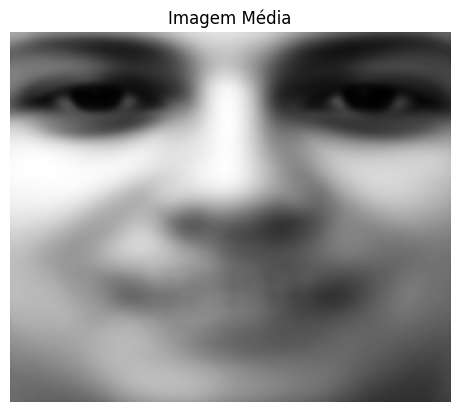

In [71]:
import matplotlib.pyplot as plt

imagem_media = np.mean(matriz, axis=0)

imagem_media_reshaped = imagem_media.reshape(162, 193)

plt.imshow(imagem_media_reshaped, cmap='gray')
plt.title("Imagem Média")
plt.axis('off')
plt.show()


[Encontrando as componentes principais]

In [72]:
matriz_centralizada = matriz - imagem_media

u, s, vh = np.linalg.svd(matriz_centralizada, full_matrices=False)

u_componentes_principais = u 

Escolha 5 das imagens e mostre como elas ficariam se usássemos apenas as primeiras 5 componentes principais.

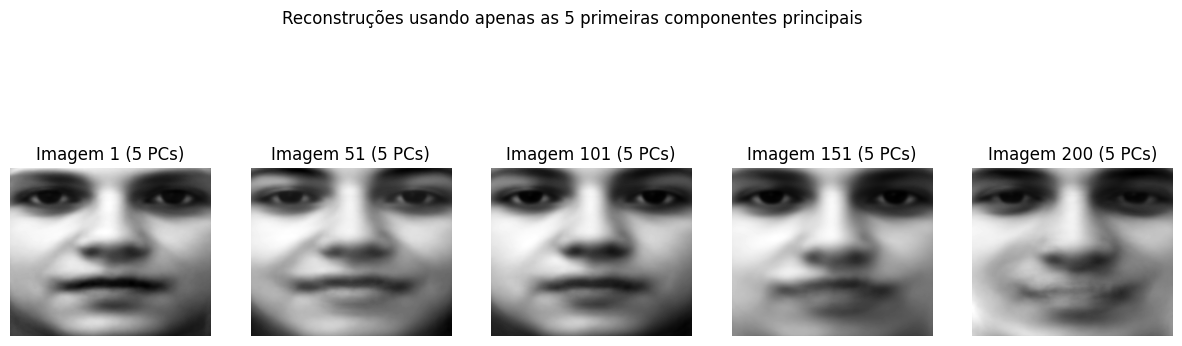

In [73]:
import matplotlib.pyplot as plt

num_componentes = 5

indices_imagens = [0, 50, 100, 150, 199]  

plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices_imagens):
    # projeções da imagem nas primeiras componentes principais
    coeficientes = np.dot(matriz_centralizada[idx, :], vh[:num_componentes, :].T)
    
    # imagem reconstruida usando apenas as primeiras componentes principais
    imagem_reconstruida = imagem_media + np.dot(coeficientes, vh[:num_componentes, :])
    imagem_reconstruida_reshaped = imagem_reconstruida.reshape(162, 193)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(imagem_reconstruida_reshaped, cmap='gray')
    plt.title(f"Imagem {idx + 1} (5 PCs)")
    plt.axis('off')

plt.suptitle("Reconstruções usando apenas as 5 primeiras componentes principais")
plt.show()


Faça duas fotos suas com resolução 162x193 pixels em tons de cinza, uma neutra e outra sorrindo no mesmo modelo das imagens fornecidas.

In [74]:
from PIL import Image, ImageOps

def redimensionar_para_jpg(input_path, output_path, tamanho=(162, 193), cor_fundo=(255, 255, 255)):
    imagem = Image.open(input_path)
    
    imagem = imagem.convert("L")
    
    imagem_redimensionada = ImageOps.fit(imagem, tamanho, method=Image.LANCZOS, centering=(0.5, 0.5))
    
    imagem_redimensionada.save(output_path, format="JPEG")
    print(f"Imagem salva em {output_path}")

caminho_imagem_original = "my_pics/IMG_1396.JPG"
caminho_imagem_redimensionada = "imagem_redimensionada_normal.jpg"

caminho_imagem_original_sorrindo = "my_pics/IMG_1397.JPG"
caminho_imagem_redimensionada_sorrindo = "imagem_redimensionada_normal_sorrindo.jpg"

redimensionar_para_jpg(caminho_imagem_original, caminho_imagem_redimensionada)
redimensionar_para_jpg(caminho_imagem_original_sorrindo, caminho_imagem_redimensionada_sorrindo)



Imagem salva em imagem_redimensionada_normal.jpg
Imagem salva em imagem_redimensionada_normal_sorrindo.jpg


Subtraia a imagem média de suas duas fotos e projete as diferenças no espaço gerado pelas 400 componentes principais obtidas acima.

In [75]:
# Carrega a imagem redimensionada e a converte para um vetor de 31266 elementos (193 * 162)
imagem_vetor = np.array(Image.open(caminho_imagem_redimensionada).convert("L")).flatten()
imagem_vetor_sorrindo = np.array(Image.open(caminho_imagem_redimensionada_sorrindo).convert("L")).flatten()


Primeiros 10 coeficientes para a imagem:
[3262.14867725  347.49516668 -482.1645144  1603.86177809 2363.17167809
 1964.65216236  687.55743946 1317.63081341 2690.71735911 1175.95394108]

Primeiros 10 coeficientes para a imagem sorrindo:
[3241.69564536  339.26506063 -857.48931392 1617.44851728 2032.70447406
 2135.56047928  600.58463837 1603.98405452 2576.39781334 1268.15781205]


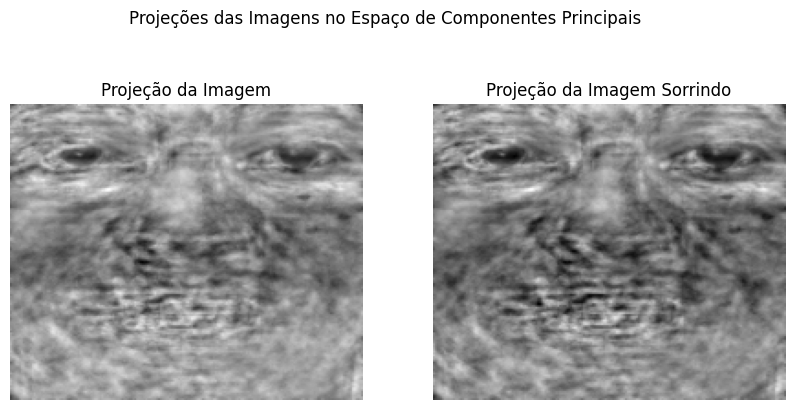

In [76]:
import matplotlib.pyplot as plt

imagem_diferenca = imagem_vetor - imagem_media
imagem_diferenca_sorrindo = imagem_vetor_sorrindo - imagem_media

# projetar diferenças no espaço das 400 componentes principais
coeficientes_imagem = np.dot(imagem_diferenca, vh.T)
coeficientes_imagem_sorrindo = np.dot(imagem_diferenca_sorrindo, vh.T)

print("Primeiros 10 coeficientes para a imagem:")
print(coeficientes_imagem[:10])

print("\nPrimeiros 10 coeficientes para a imagem sorrindo:")
print(coeficientes_imagem_sorrindo[:10])

# reconstruir as projeções usando todos os 400 coeficientes
projecao_imagem = imagem_media + np.dot(coeficientes_imagem, vh)
projecao_imagem_sorrindo = imagem_media + np.dot(coeficientes_imagem_sorrindo, vh)

projecao_imagem_reshaped = projecao_imagem.reshape(162, 193)
projecao_imagem_sorrindo_reshaped = projecao_imagem_sorrindo.reshape(162, 193)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(projecao_imagem_reshaped, cmap='gray')
plt.title("Projeção da Imagem")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(projecao_imagem_sorrindo_reshaped, cmap='gray')
plt.title("Projeção da Imagem Sorrindo")
plt.axis('off')

plt.suptitle("Projeções das Imagens no Espaço de Componentes Principais")
plt.show()


Os primeiros 10 coeficientes 
(𝑎1,𝑎2,…,𝑎10) fornecem uma representação simplificada de cada imagem nas dimensões mais significativas do espaço gerado pelas componentes principais. Os coeficientes diferem entre a imagem original e a imagem sorrindo, refletindo as variações nas expressões faciais. A reconstrução (ou projeção) de cada imagem a partir desses coeficientes deve aproximar a aparência original, destacando as principais diferenças visuais sem todos os detalhes.

[Classificação]

In [77]:
y_verdadeiro_genero = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1,
                       1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1,
                       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1,
                       1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1,
                       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1,
                       1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                       1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                       1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1,
                       1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1,
                       1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1,
                       -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
                       1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 
                       1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 
                       -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 
                       -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 
                       -1, -1, -1, -1, -1, -1, -1, -1, 1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1, -1,-1,-1,-1,-1,-1,-1, -1, -1, -1])

y_verdadeiro_sorriso = np.array([-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 
                        1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 
                        -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 
                        1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 
                        -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 
                        1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 
                        -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 
                        1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 
                        -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 
                        1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 
                        -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 
                        1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 
                        -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 
                        1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 
                        -1, 1, -1, 1, -1, 1, -1, 1, -1, 1,-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1
                        , -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1])


In [78]:
y_verdadeiro_genero.size

360

In [79]:
y_verdadeiro_sorriso.size

360

Acurácia com 2 componentes principais:
- Mínimos Quadrados: 51.39%
- Perceptron: 53.06%

Previsão para o índice de teste 99:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


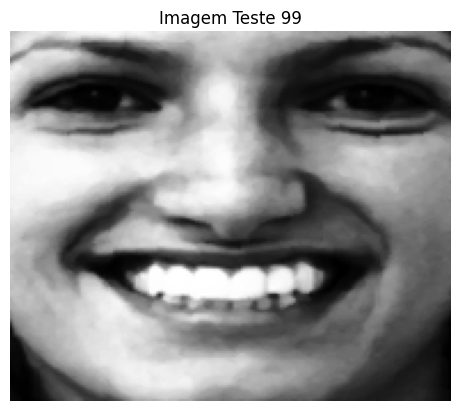



Acurácia com 50 componentes principais:
- Mínimos Quadrados: 58.06%
- Perceptron: 65.28%

Previsão para o índice de teste 99:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


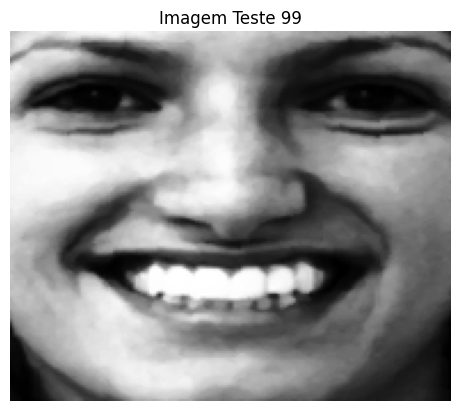

In [80]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

indices_mulheres = [ 397, 396, 395, 394, 393, 392, 391, 390, 367, 366, 365, 364, 90, 91, 92, 93, 96, 97, 98 ,99]
indices_homens = [ 14, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 38, 39, 104, 105]

X_treino = np.vstack([matriz[idx] for idx in indices_mulheres + indices_homens])
y_treino = np.array([1] * len(indices_mulheres) + [-1] * len(indices_homens))

X_teste = np.delete(matriz, indices_mulheres + indices_homens, axis=0)


def treinar_e_avaliar(n_componentes, indice_teste):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    X_treino_reduzido = X_reduzido[indices_mulheres + indices_homens]
    X_teste_reduzido = np.delete(X_reduzido, indices_mulheres + indices_homens, axis=0)

    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    acuracia_regressao = accuracy_score(y_verdadeiro_genero, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro_genero, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")
    

    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nPrevisão para o índice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Mulher' if previsao_regressao == 1 else 'Homem'}")
        print(f"- Perceptron: {'Mulher' if previsao_perceptron == 1 else 'Homem'}")

        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

indice_teste = 99  

treinar_e_avaliar(2, indice_teste)
print('\n')

treinar_e_avaliar(50, indice_teste)


Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 0:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


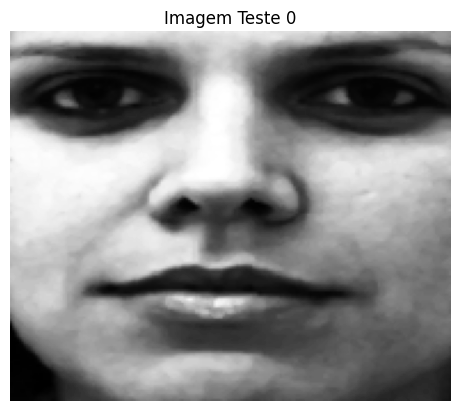

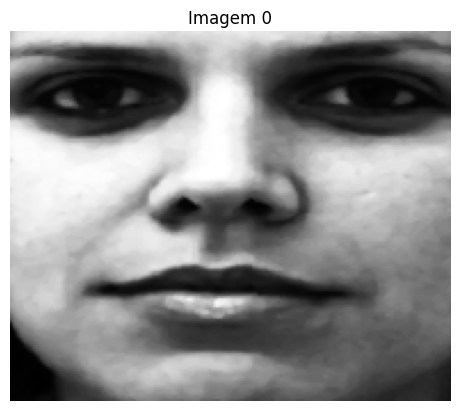

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 1:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


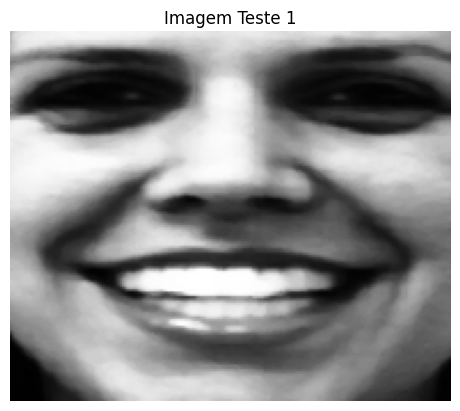

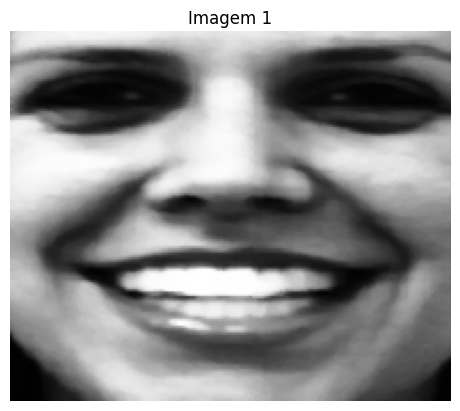

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 2:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


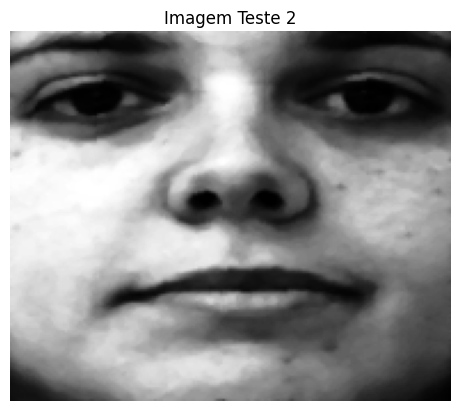

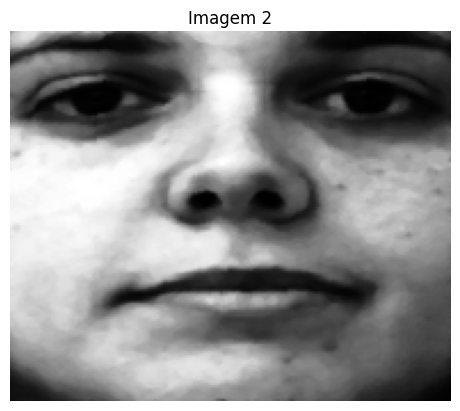

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 3:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


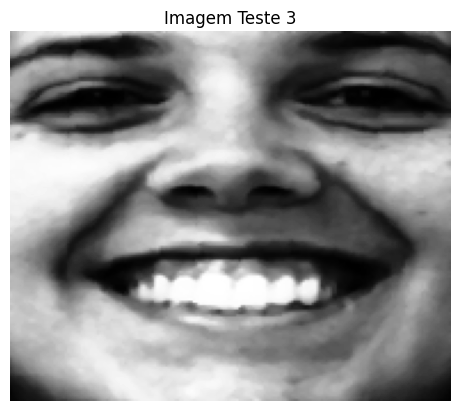

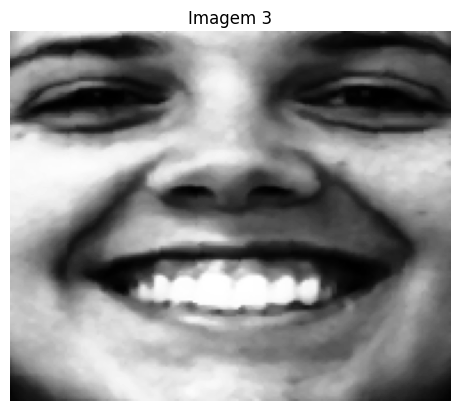

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 4:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


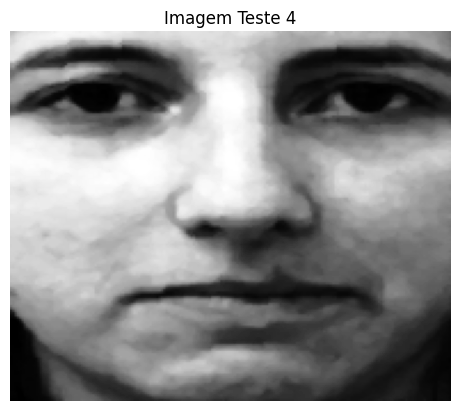

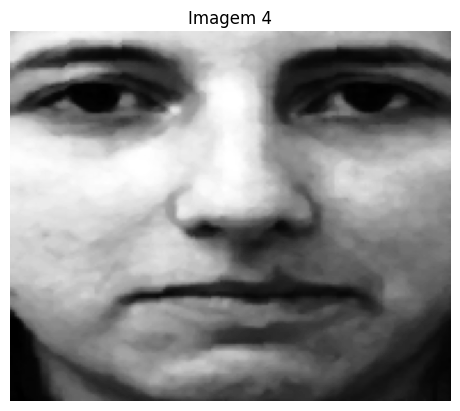

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 5:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


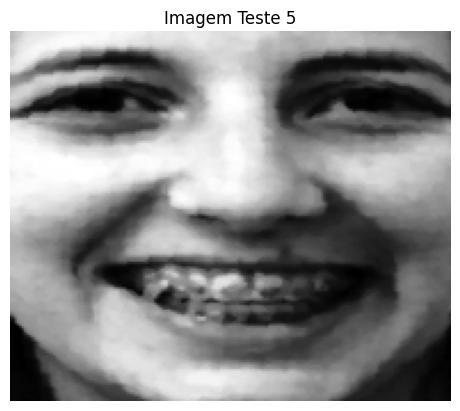

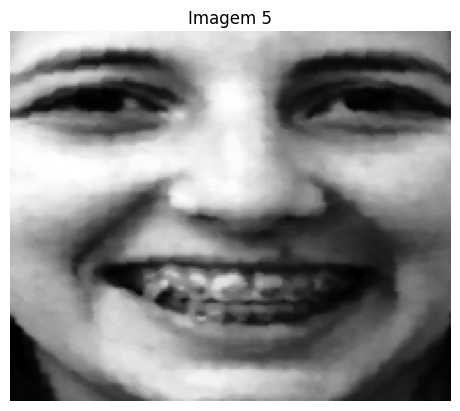

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 6:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


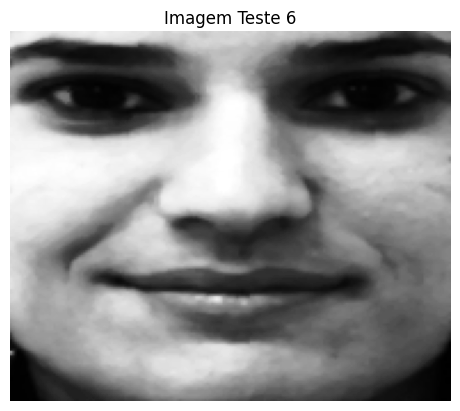

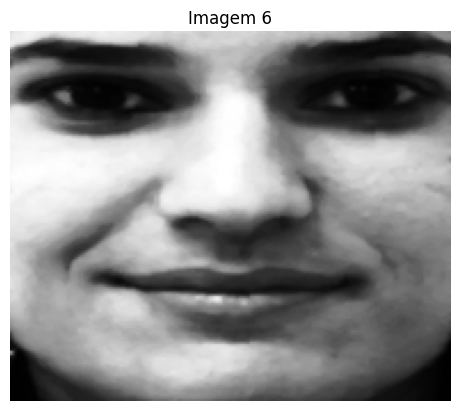

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 7:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


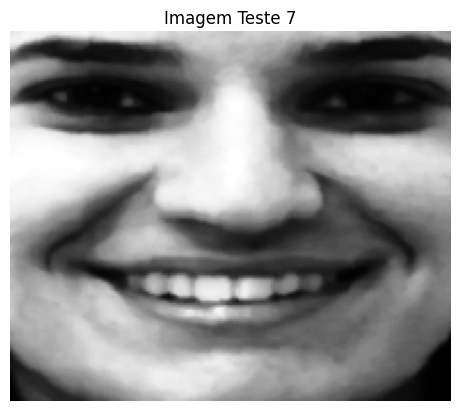

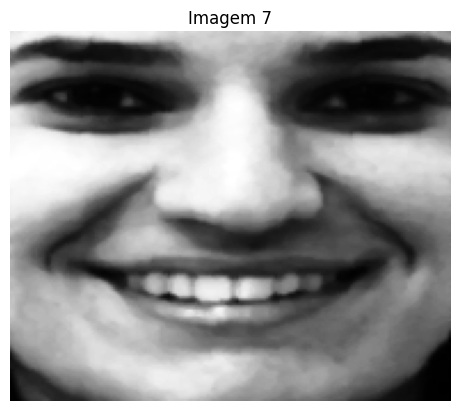

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 8:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


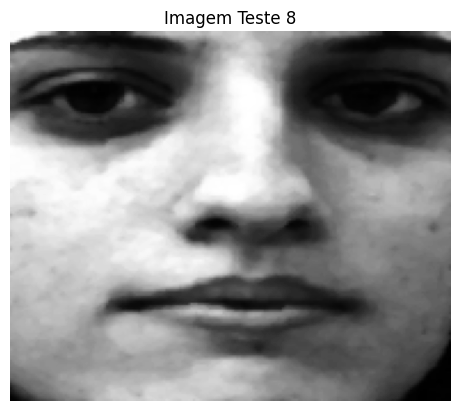

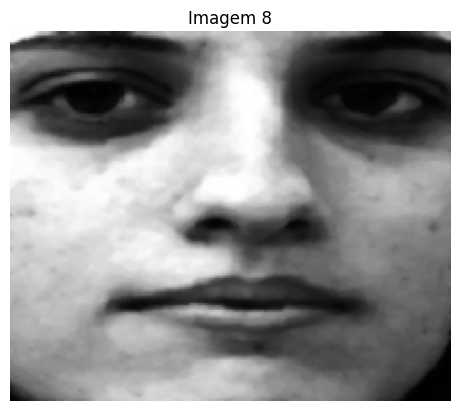

Acurácia com 10 componentes principais:
- Mínimos Quadrados: 62.22%
- Perceptron: 60.00%

Índice 9:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


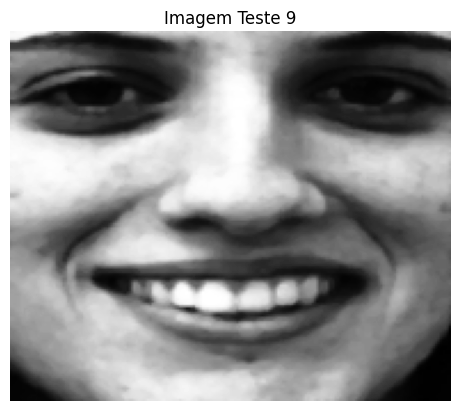

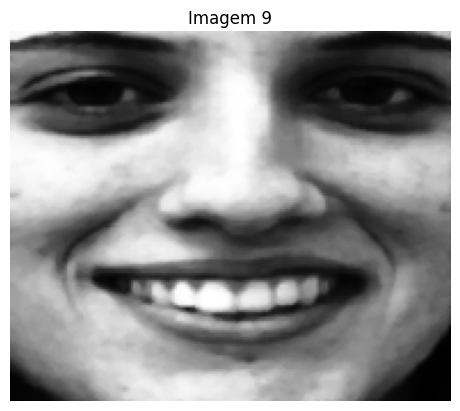

In [81]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

X_treino_mulheres = np.vstack([matriz[idx] for idx in indices_mulheres])
y_treino_mulheres = np.array([1] * len(indices_mulheres)) 

X_treino_homens = np.vstack([matriz[idx] for idx in indices_homens])
y_treino_homens = np.array([-1] * len(indices_homens))

X_treino = np.vstack([X_treino_mulheres, X_treino_homens])
y_treino = np.concatenate([y_treino_mulheres, y_treino_homens])

X_teste = np.delete(matriz, indices_mulheres + indices_homens, axis=0)

def treinar_e_avaliar(n_componentes, indice_teste, y_verdadeiro_genero):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    X_treino_reduzido = X_reduzido[indices_mulheres + indices_homens]
    X_teste_reduzido = np.delete(X_reduzido, indices_mulheres + indices_homens, axis=0)

    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    acuracia_regressao = accuracy_score(y_verdadeiro_genero, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro_genero, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nÍndice {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Mulher' if previsao_regressao == 1 else 'Homem'}")
        print(f"- Perceptron: {'Mulher' if previsao_perceptron == 1 else 'Homem'}")

        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

for i in range(10):
    treinar_e_avaliar(10, i, y_verdadeiro_genero)
    mostrar_imagem(matriz[i], titulo=f"Imagem {i}")


Repita a operação 6 para classificar se a pessoa da foto está sorrindo ou não

Acurácia com 2 componentes principais para classificação de sorriso:
- Mínimos Quadrados: 88.61%
- Perceptron: 81.94%

Previsão para o índice de teste 42:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


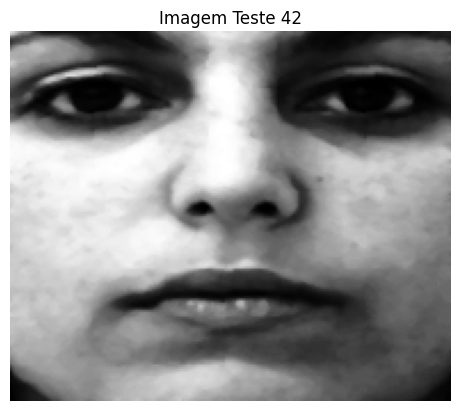

Acurácia com 100 componentes principais para classificação de sorriso:
- Mínimos Quadrados: 93.33%
- Perceptron: 87.78%

Previsão para o índice de teste 42:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


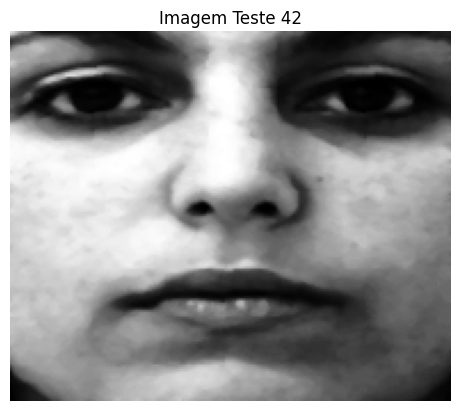

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

indices_sorrindo = [1, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43] 
indices_nao_sorrindo = [0, 40, 42, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]  


X_treino_sorrindo = np.vstack([matriz[idx] for idx in indices_sorrindo])
y_treino_sorrindo = np.array([1] * len(indices_sorrindo)) 

X_treino_nao_sorrindo = np.vstack([matriz[idx] for idx in indices_nao_sorrindo])
y_treino_nao_sorrindo = np.array([-1] * len(indices_nao_sorrindo))

# Combinar os dados de treino
X_treino = np.vstack([X_treino_sorrindo, X_treino_nao_sorrindo])
y_treino = np.concatenate([y_treino_sorrindo, y_treino_nao_sorrindo])

# Extrair as imagens de teste
X_teste = np.delete(matriz, indices_sorrindo + indices_nao_sorrindo, axis=0)

def treinar_e_avaliar_sorriso(n_componentes, indice_teste, y_verdadeiro_sorriso):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # Dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_sorrindo + indices_nao_sorrindo]
    X_teste_reduzido = np.delete(X_reduzido, indices_sorrindo + indices_nao_sorrindo, axis=0)

    # Mínimos Quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # Perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    # Usar `y_verdadeiro_sorriso` para acurácia
    acuracia_regressao = accuracy_score(y_verdadeiro_sorriso, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro_sorriso, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais para classificação de sorriso:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nPrevisão para o índice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Sorrindo' if previsao_regressao == 1 else 'Não Sorrindo'}")
        print(f"- Perceptron: {'Sorrindo' if previsao_perceptron == 1 else 'Não Sorrindo'}")

        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

indice_teste = 42  

treinar_e_avaliar_sorriso(2, indice_teste, y_verdadeiro_sorriso)
treinar_e_avaliar_sorriso(100, indice_teste, y_verdadeiro_sorriso)


Overfitting ao aumentar o número de componentes principais, redução de dimensionalidade não garante melhora contínua

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 0:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


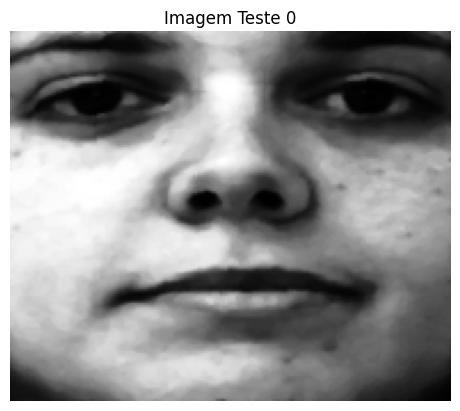

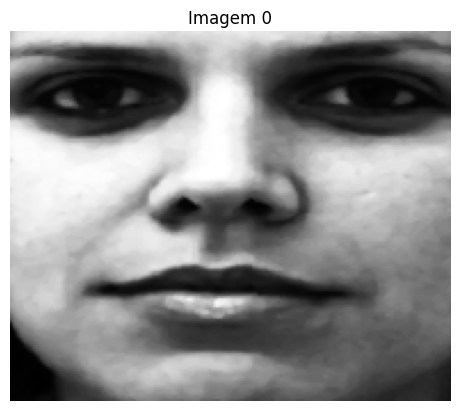

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 1:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


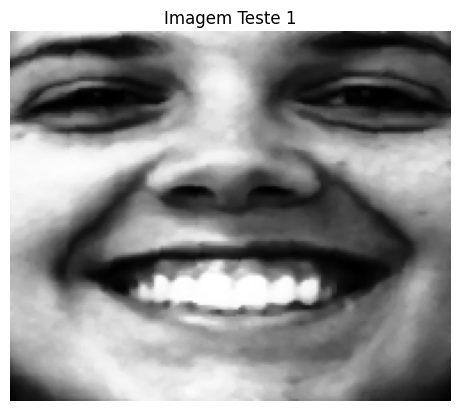

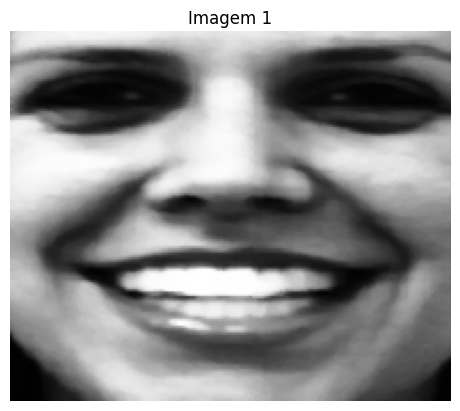

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 2:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


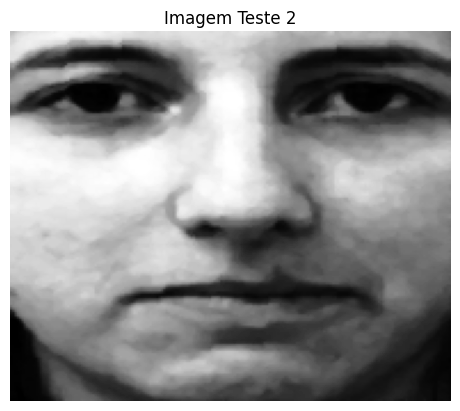

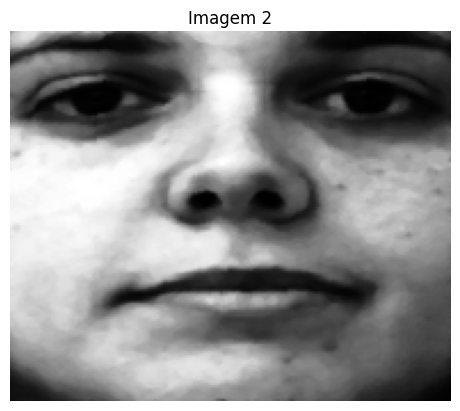

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 3:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Sorrindo


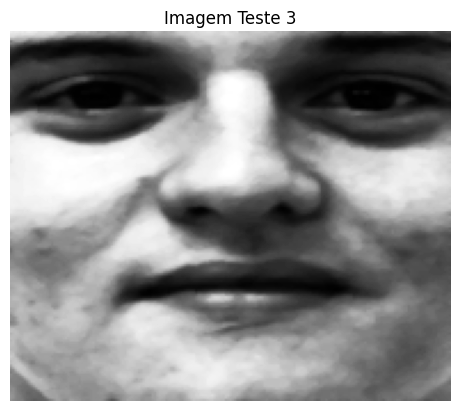

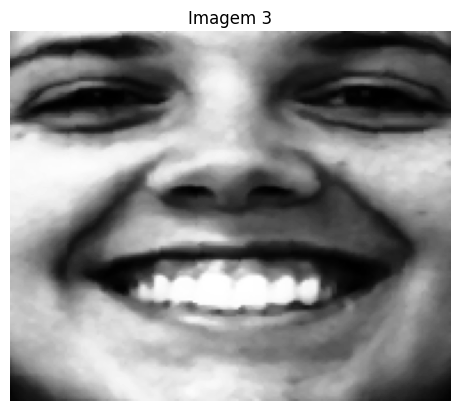

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 4:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


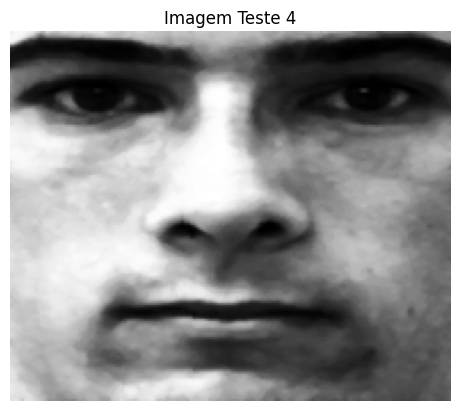

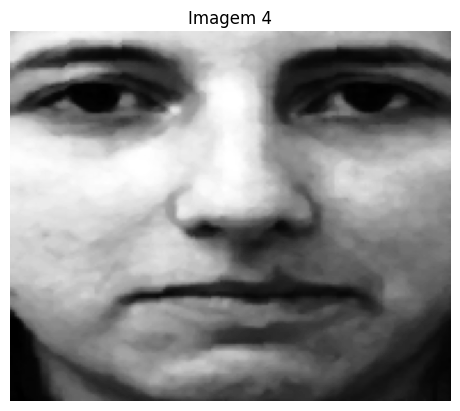

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 5:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


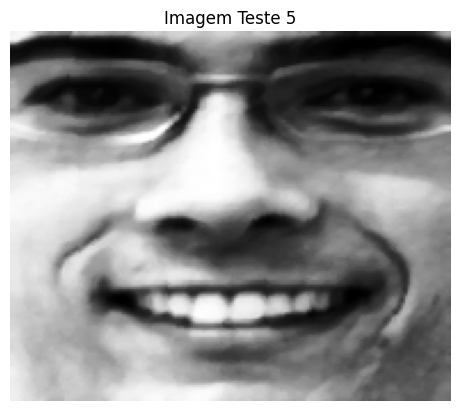

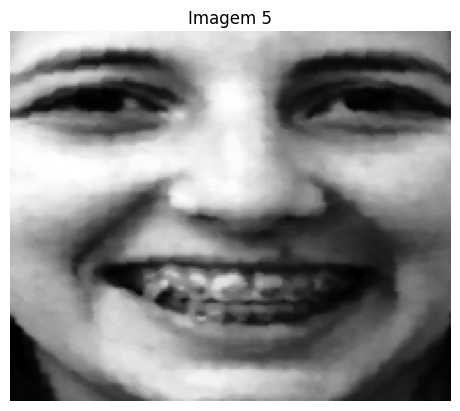

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 6:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


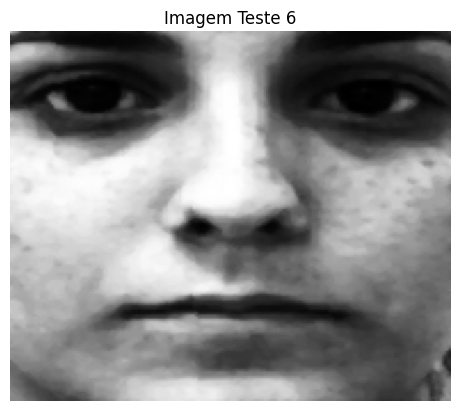

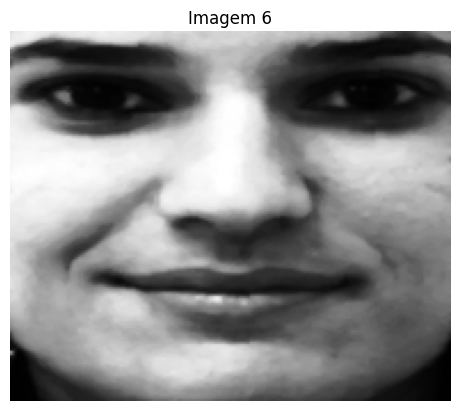

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 7:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


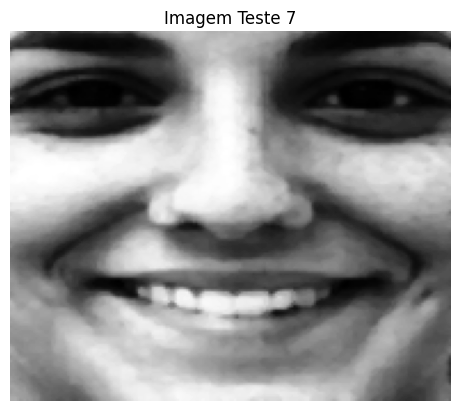

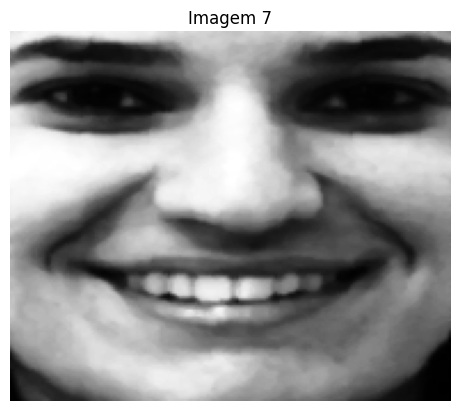

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 8:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


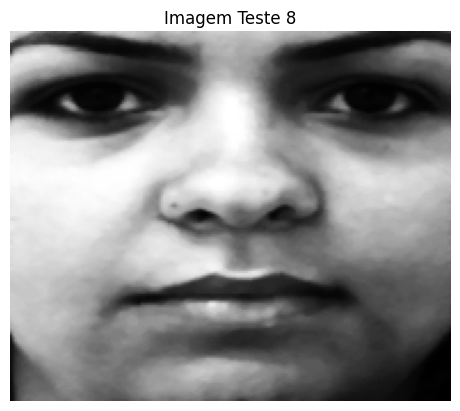

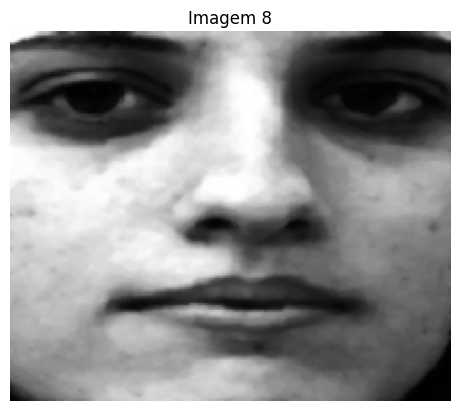

Acurácia com 3 componentes principais:
- Mínimos Quadrados: 91.94%
- Perceptron: 93.33%

Índice de teste 9:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


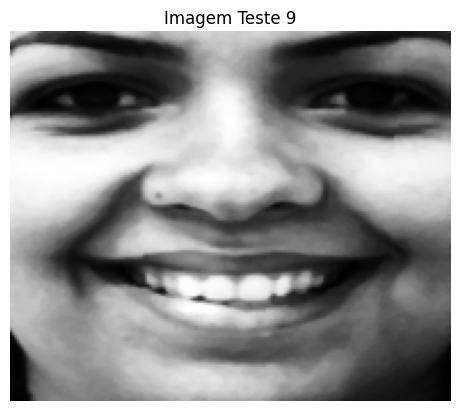

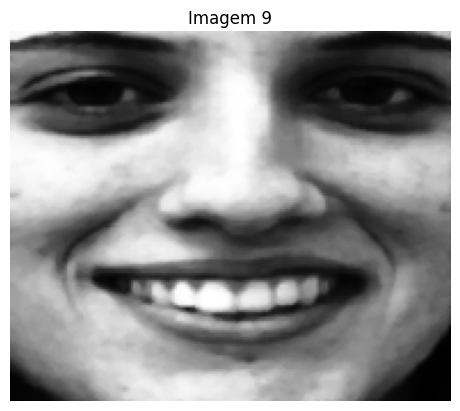

In [83]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

indices_sorrindo = [1, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43] 
indices_nao_sorrindo = [0, 40, 42, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]  

X_treino_sorrindo = np.vstack([matriz[idx] for idx in indices_sorrindo])
y_treino_sorrindo = np.array([1] * len(indices_sorrindo)) 

X_treino_nao_sorrindo = np.vstack([matriz[idx] for idx in indices_nao_sorrindo])
y_treino_nao_sorrindo = np.array([-1] * len(indices_nao_sorrindo))

X_treino = np.vstack([X_treino_sorrindo, X_treino_nao_sorrindo])
y_treino = np.concatenate([y_treino_sorrindo, y_treino_nao_sorrindo])

X_teste = np.delete(matriz, indices_sorrindo + indices_nao_sorrindo, axis=0)

def treinar_e_avaliar_sorriso(n_componentes, indice_teste, y_verdadeiro_sorriso):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    X_treino_reduzido = X_reduzido[indices_sorrindo + indices_nao_sorrindo]
    X_teste_reduzido = np.delete(X_reduzido, indices_sorrindo + indices_nao_sorrindo, axis=0)

    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    acuracia_regressao = accuracy_score(y_verdadeiro_sorriso, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro_sorriso, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nÍndice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Sorrindo' if previsao_regressao == 1 else 'Não Sorrindo'}")
        print(f"- Perceptron: {'Sorrindo' if previsao_perceptron == 1 else 'Não Sorrindo'}")

        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

for i in range(10):
    treinar_e_avaliar_sorriso(3, i, y_verdadeiro_sorriso)
    mostrar_imagem(matriz[i], titulo=f"Imagem {i}")
